In [25]:
import pandas as pd

In [26]:
df = pd.read_csv("banana_quality.csv")
df.head()

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity,Quality
0,-1.924968,0.468078,3.077832,-1.472177,0.294799,2.435570,0.271290,Good
1,-2.409751,0.486870,0.346921,-2.495099,-0.892213,2.067549,0.307325,Good
2,-0.357607,1.483176,1.568452,-2.645145,-0.647267,3.090643,1.427322,Good
3,-0.868524,1.566201,1.889605,-1.273761,-1.006278,1.873001,0.477862,Good
4,0.651825,1.319199,-0.022459,-1.209709,-1.430692,1.078345,2.812442,Good


In [27]:
print(df.describe())
print(df.shape)

              Size       Weight    Sweetness     Softness  HarvestTime  \
count  8000.000000  8000.000000  8000.000000  8000.000000  8000.000000   
mean     -0.747802    -0.761019    -0.770224    -0.014441    -0.751288   
std       2.136023     2.015934     1.948455     2.065216     1.996661   
min      -7.998074    -8.283002    -6.434022    -6.959320    -7.570008   
25%      -2.277651    -2.223574    -2.107329    -1.590458    -2.120659   
50%      -0.897514    -0.868659    -1.020673     0.202644    -0.934192   
75%       0.654216     0.775491     0.311048     1.547120     0.507326   
max       7.970800     5.679692     7.539374     8.241555     6.293280   

          Ripeness      Acidity  
count  8000.000000  8000.000000  
mean      0.781098     0.008725  
std       2.114289     2.293467  
min      -7.423155    -8.226977  
25%      -0.574226    -1.629450  
50%       0.964952     0.098735  
75%       2.261650     1.682063  
max       7.249034     7.411633  
(8000, 8)


In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         8000 non-null   float64
 1   Weight       8000 non-null   float64
 2   Sweetness    8000 non-null   float64
 3   Softness     8000 non-null   float64
 4   HarvestTime  8000 non-null   float64
 5   Ripeness     8000 non-null   float64
 6   Acidity      8000 non-null   float64
 7   Quality      8000 non-null   object 
dtypes: float64(7), object(1)
memory usage: 500.1+ KB


In [30]:
df["Quality"].value_counts

<bound method IndexOpsMixin.value_counts of 0       Good
1       Good
2       Good
3       Good
4       Good
        ... 
7995     Bad
7996     Bad
7997     Bad
7998     Bad
7999     Bad
Name: Quality, Length: 8000, dtype: object>

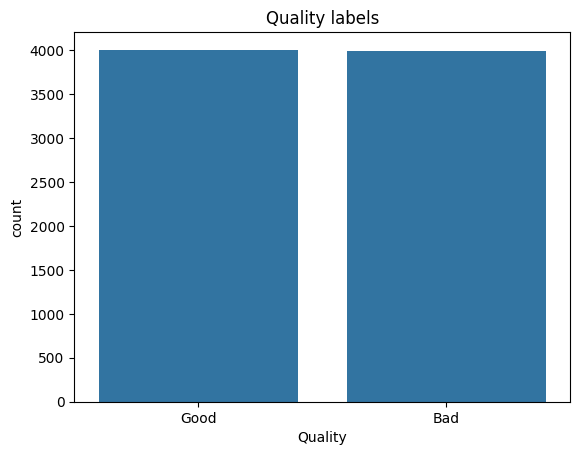

In [31]:
sns.countplot(x="Quality", data=df) #fördelnigar mellan dåliga och bra bananer
plt.title("Quality labels")
plt.show()

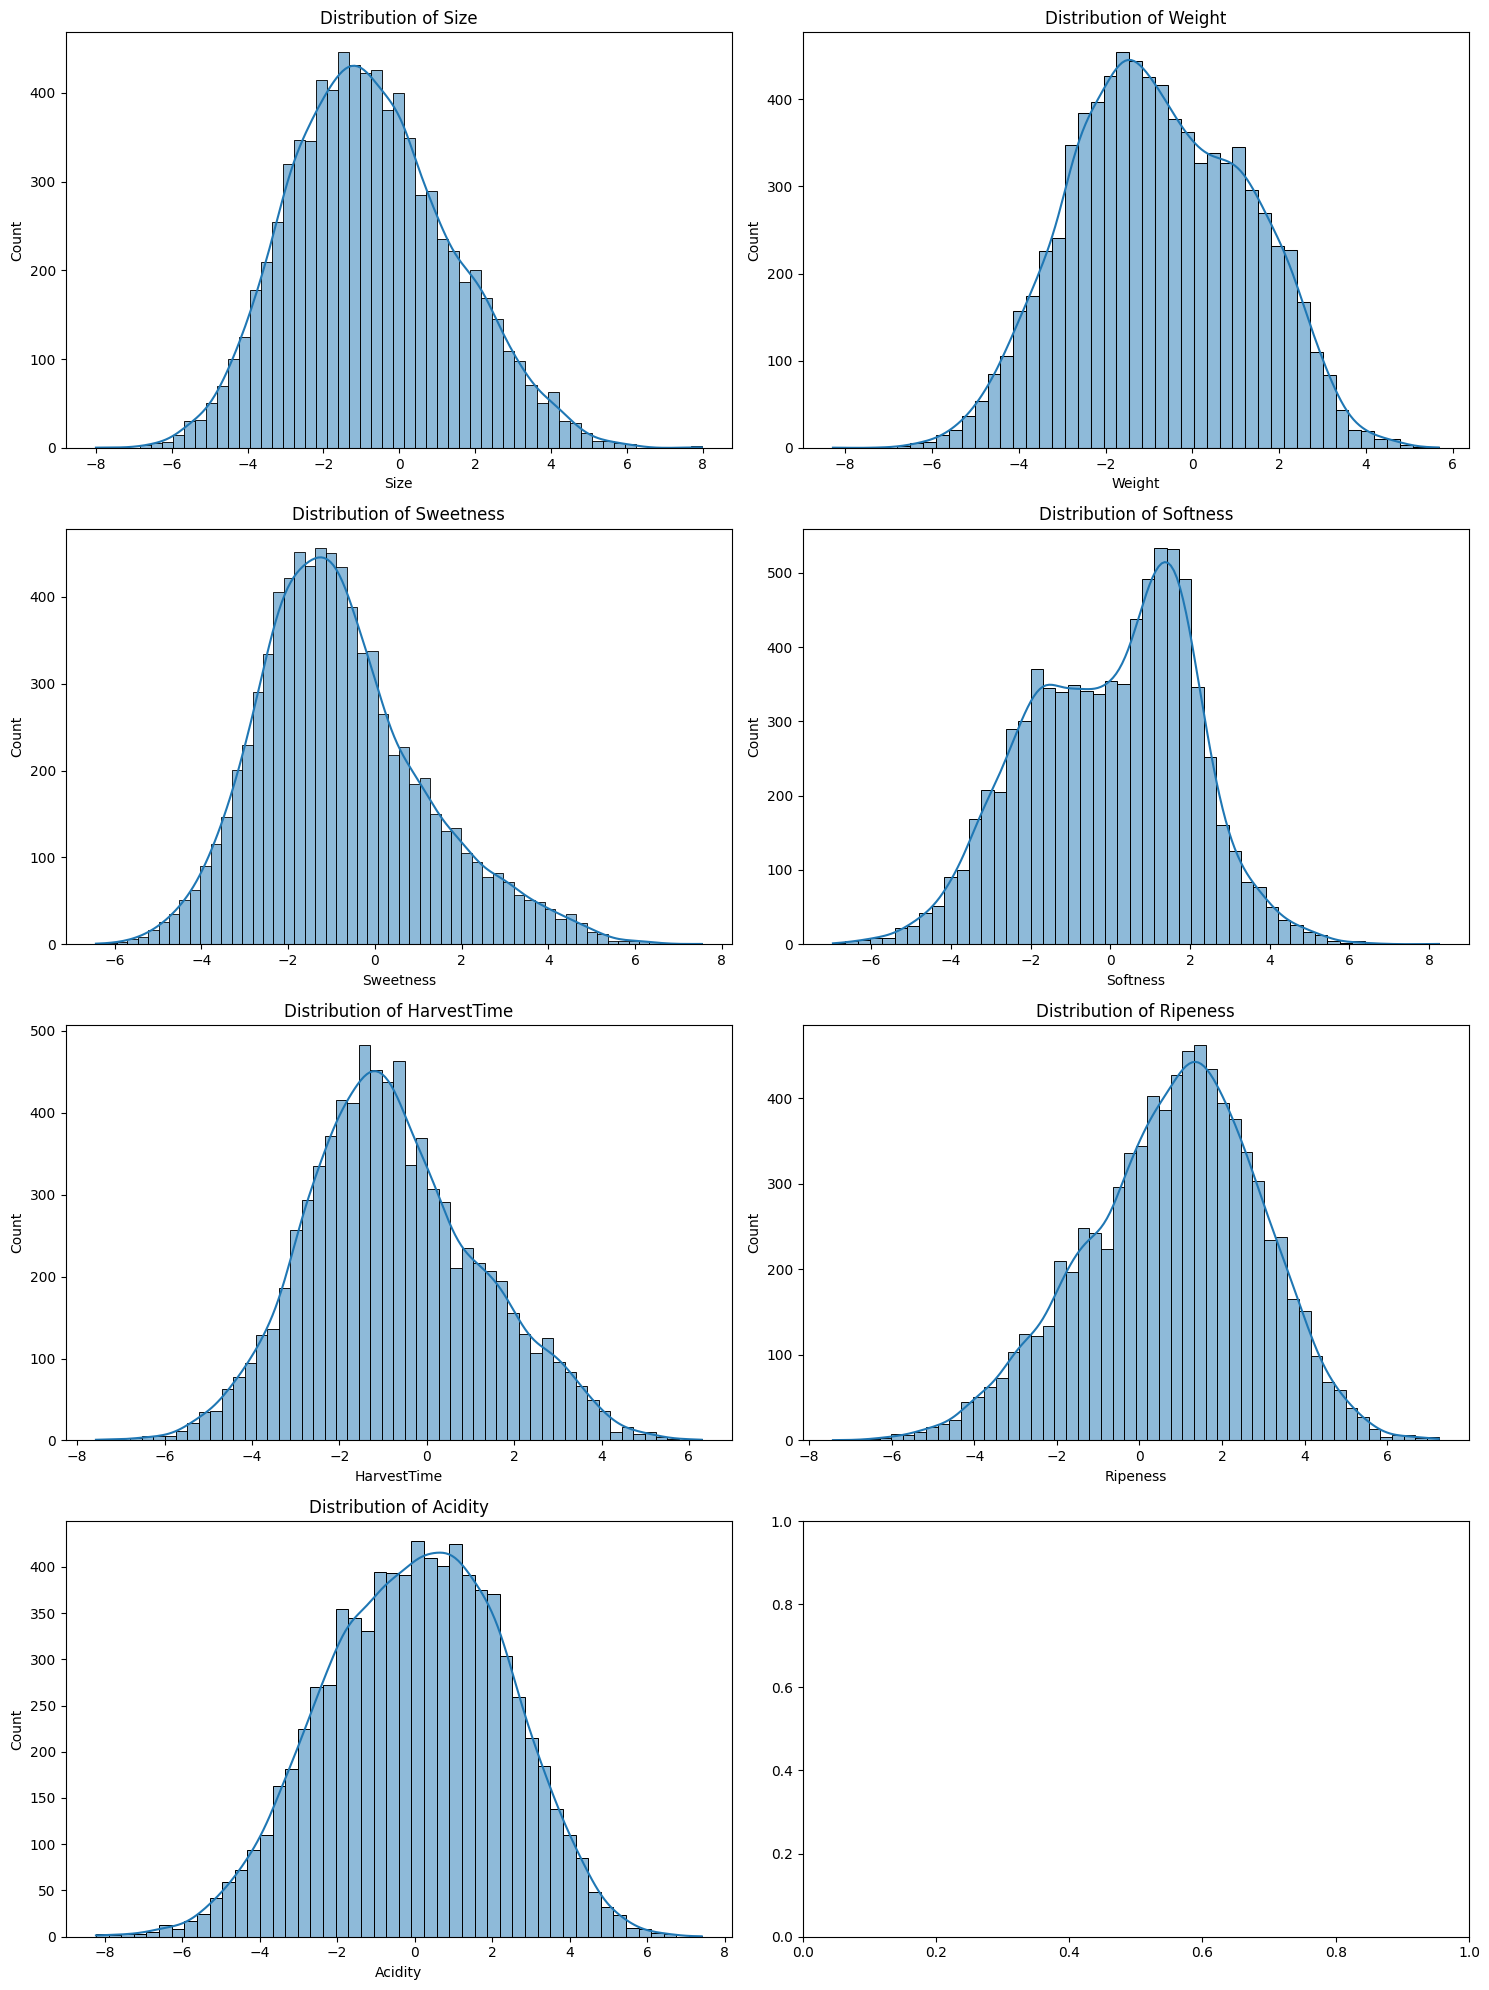

In [32]:
features =  df.columns.drop("Quality") #Tar bort quality från features

n_features = len(features)
n_cols = 2 
n_rows = n_features // n_cols + (n_features % n_cols > 0) #Beräknar raderna som behövs

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows)) #Skapar en figur och axlar (subplots)

for i, feature in enumerate(features):  #Går igenom och gör alla plots och skapar histogrammet
    row = i // n_cols
    col = i % n_cols
    ax = axes[row, col]
    sns.histplot(df[feature], kde=True, ax=ax)
    ax.set_title(f'Distribution of {feature}')

plt.tight_layout()  #Justerar layouten så det får plats
plt.show()

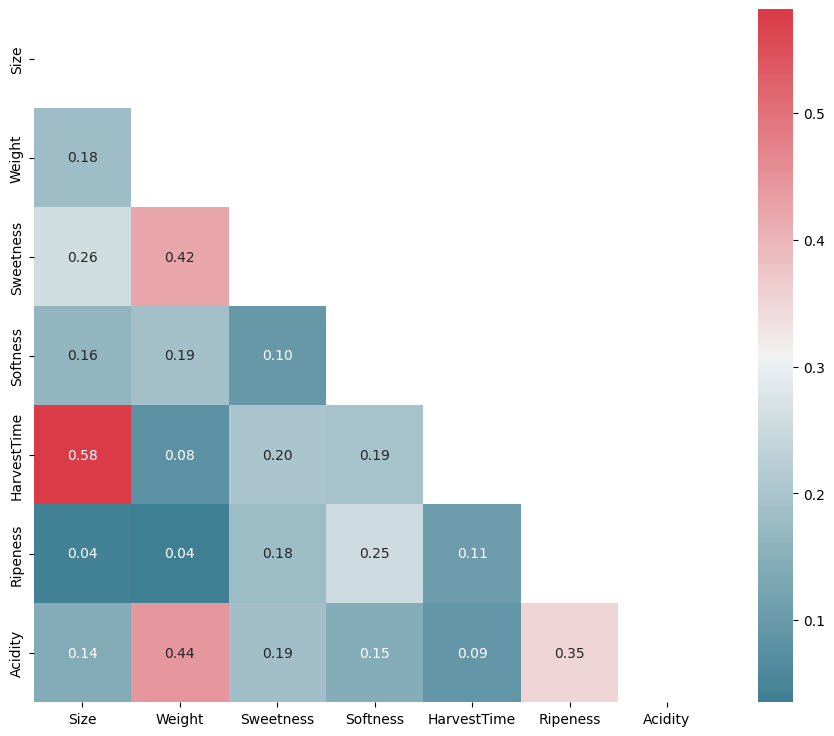

In [33]:
import numpy as np

def print_corr_heatmap(df):
    numeric_df = df.select_dtypes(include=[np.number]) #använder bara numeriska värden(bara quaility som är object i mitt dataset)
    corr_df = numeric_df.corr()

    plt.figure(figsize=(11, 9))
    drop_self = np.zeros_like(corr_df)
    drop_self[np.triu_indices_from(drop_self)] = True

    sns.heatmap(corr_df.abs(), cmap=sns.diverging_palette(220, 10, as_cmap=True), annot=True, fmt=".2f", mask=drop_self)

print_corr_heatmap(df)

    #printar ut heatmap

In [34]:
y = df["Quality"]
x = df.drop(["Quality"], axis=1)

x.shape

(8000, 7)

In [35]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=10) #lite bättre resultat på logreg och dt med högre testsize

print("Train data:", len(x_train))
print("Test data:", len(x_test))

Train data: 5600
Test data: 2400


In [36]:
from sklearn.preprocessing import StandardScaler  #Vissa modeller kräver skalning och bra praxis att alltid göra det

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg_model = LogisticRegression(max_iter=200, solver="liblinear", multi_class="ovr") #lbfgs + multinomial gav samma resultat
logreg_model.fit(x_train, y_train)

logreg_pred = logreg_model.predict(x_test)

print("Accuracy:", accuracy_score(y_test, logreg_pred))

Accuracy: 0.8829166666666667


In [38]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=10, criterion= 'entropy', max_depth= None, min_samples_leaf= 1, min_samples_split= 2)
dt_model.fit(x_train, y_train)

dt_pred = dt_model.predict(x_test)

print("Accuracy:", accuracy_score(y_test, dt_pred))

Accuracy: 0.9366666666666666


In [39]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=10, max_depth=30, n_estimators=300 )
rf_model.fit(x_train, y_train)

rf_pred = rf_model.predict(x_test)

print("Accuracy:", accuracy_score(y_test, rf_pred))

Accuracy: 0.9708333333333333


In [40]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 10, None],  #maximala djupet på trädet
    'min_samples_split': [2, 5, 10],  #minsta antalet prover som krävsa för att dela en nod
    'min_samples_leaf': [1, 2, 4],  #minsta antalet prover som måste finnas i en lövnod
    'criterion': ['gini', 'entropy'] 
}

rf = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

grid_search.fit(x_train, y_train)

print("Best hyperparameters for dt:", grid_search.best_params_)

param_grid = {
    'n_estimators': [100, 200, 300],   #antalet träd i skogen
    'max_depth': [10, 20, 30, None]    #maximala djupet av träden
}

rf = RandomForestClassifier(random_state=10)

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

grid_search.fit(x_train, y_train)

print("Best hyperparameters for rt:", grid_search.best_params_)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best hyperparameters for dt: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best hyperparameters for rt: {'max_depth': 20, 'n_estimators': 100}
[CV] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END criterion=gini, max_depth=3, min_samples_leaf=4, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=5, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[